In [3]:
from cProfile import label

import numpy as np
import pandas as pd

np.__version__

'2.1.3'

In [ ]:
from sklearn import show_versions
show_versions()


System:
    python: 3.13.2 (v3.13.2:4f8bb3947cf, Feb  4 2025, 11:51:10) [Clang 15.0.0 (clang-1500.3.9.4)]
executable: /usr/local/bin/python3.13
   machine: macOS-26.0-arm64-arm-64bit-Mach-O

Python dependencies:
      sklearn: 1.6.1
          pip: 24.3.1
   setuptools: 75.8.0
        numpy: 1.26.4
        scipy: 1.16.0
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 14
         prefix: libomp
       filepath: /Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/.dylibs/libomp.dylib
        version: None


Text(0.5, 1.0, 'ÌïúÍ∏Ä ÌÉÄÏù¥ÌãÄ...')

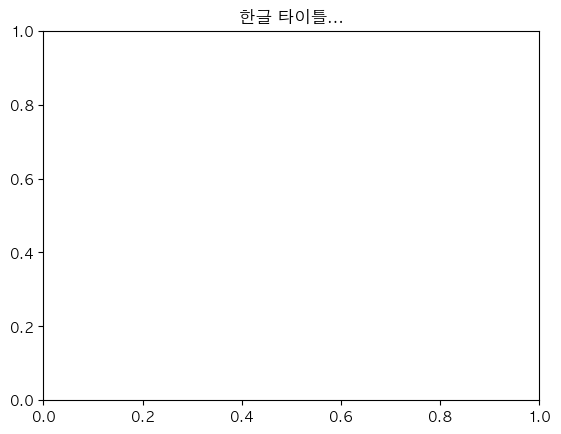

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic ÎòêÎäî AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic ÎòêÎäî Îã§Î•∏ ÏÑ§ÏπòÎêú ÌïúÍ∏Ä Ìè∞Ìä∏)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: AxesÏóê - ÌëúÏãú ÏïàÎêòÎäî Í≤É
plt.title('ÌïúÍ∏Ä ÌÉÄÏù¥ÌãÄ...')

# 1. Îç∞Ïù¥ÌÑ∞Ïùò Ïú†Ìòï

<u>ÏÑ†ÌòïÎåÄÏàò</u>ÏóêÏÑú Îã§Î£®Îäî Îç∞Ïù¥ÌÑ∞Îäî Í∞úÏàòÎÇò ÌòïÌÉúÏóê Îî∞Îùº ÌÅ¨Í≤å **Ïä§ÏπºÎùº(scalar), Î≤°ÌÑ∞(vector), ÌñâÎ†¨(matrix), ÌÖêÏÑú(tensor)** Ïú†ÌòïÏúºÎ°ú ÎÇòÎâúÎã§. 

- Ïä§ÏπºÎùºÎäî Ïà´Ïûê ÌïòÎÇòÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Ïù¥Í≥†, 
- Î≤°ÌÑ∞Îäî Ïó¨Îü¨ Ïà´ÏûêÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìú(data record)Ïù¥Î©∞, 
- ÌñâÎ†¨ÏùÄ Ïù¥Îü¨Ìïú Î≤°ÌÑ∞, Ï¶â Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìúÍ∞Ä Ïó¨ÎüøÏù∏ Îç∞Ïù¥ÌÑ∞ ÏßëÌï©Ïù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§. 
- ÌÖêÏÑúÎäî Í∞ôÏùÄ ÌÅ¨Í∏∞Ïùò ÌñâÎ†¨Ïù¥ Ïó¨Îü¨ Í∞ú ÏûàÎäî Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎ©¥ ÎêúÎã§.

#### Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú

<p><img src='https://blog.kakaocdn.net/dn/br1FDr/btr7s3bSOVP/Zs35uUgIpN7Rj4A7iYN0mk/img.png' width='600'></p>

- Î≤îÏ£ºÌòï
    - Î™ÖÎ™©Ìòï: ÏÑ±Î≥Ñ, ÌòàÏï°Ìòï
    - ÏàúÏúÑÌòï: 1Îì±, 2Îì±. 1ÏúÑ, 2ÏúÑ. AÌïôÏ†ê, BÌïôÏ†ê
- ÏàòÏπòÌòï
    - Ïù¥ÏÇ∞Ìòï: ÎÇòÏù¥, Î∞©Î¨∏Ïûê Ïàò, Îâ¥Ïä§ Í∏ÄÏûê Ïàò, ÏÉÅÌíàÏùò Ï£ºÎ¨∏Îüâ
    - Ïó∞ÏÜçÌòï: ÌÇ§, Î™∏Î¨¥Í≤å, ÏãúÍ∞Ñ

## [1] Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï

Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùò Ïó∞ÏäµÏóêÏÑú ÎßéÏù¥ ÏÇ¨Ïö©ÎêòÎäî Î≤§ÏπòÎßàÌÅ¨ Îç∞Ïù¥ÌÑ∞ÏÖã(benchmark dataset) Ï§ë ÌïòÎÇòÏù∏ Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ÏÖã(iris dataset)ÏùÑ ÏÇ¥Ìé¥Î≥¥Î©∞ Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏùÑ ÏïåÏïÑÎ≥¥Ïûê. Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî ÌÜµÍ≥ÑÌïôÏûê ÌîºÏÖî(Fisher)Ïùò Ïó∞Íµ¨ Í≤∞Í≥ºÏóêÏÑú ÎÇòÏò® Í≤ÉÏù¥Îã§. Î∂ìÍΩÉ 150ÏÜ°Ïù¥Ïóê ÎåÄÌï¥ ÍΩÉÎ∞õÏπ®Ïùò Í∏∏Ïù¥, ÍΩÉÎ∞õÏπ®Ïùò Ìè≠, ÍΩÉÏûéÏùò Í∏∏Ïù¥, ÍΩÉÏûéÏùò Ìè≠ÏùÑ Í∞ÅÍ∞Å Ï∏°Ï†ïÌïú Í≤ÉÏúºÎ°ú 150ÏÜ°Ïù¥ Ï§ë 50ÏÜ°Ïù¥Îäî ÏÑ∏ÌÜ†ÏÇ¨(setosa)ÎùºÎäî Ï¢ÖÏù¥Í≥†, 50ÏÜ°Ïù¥Îäî Î≤†Î•¥ÏãúÏπºÎùº(versicolor), ÎÇòÎ®∏ÏßÄ 50ÏÜ°Ïù¥Îäî Î≤ÑÏßÄÎãàÏπ¥(virginica)ÎùºÎäî Ï¢ÖÏù¥Îã§. Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Î∂ìÍΩÉ ÌÅ¨Í∏∞Î•º Ïù¥Ïö©ÌïòÏó¨ Î∂ìÍΩÉÏùò Ï¢ÖÏùÑ Ï∏°Ï†ïÌïòÎäî ÏòàÏ∏°(prediction) Î¨∏Ï†úÎ°ú ÌôúÏö©ÎêúÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî ÏÇ¨Ïù¥ÌÇ∑Îü∞ Ìå®ÌÇ§ÏßÄÏóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎã§. Îã§Ïùå ÏΩîÎìúÎäî Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï≤´ Î≤àÏß∏ ÍΩÉÏùò ÌÅ¨Í∏∞Î•º Î≥¥Ïó¨Ï§ÄÎã§.

- [Scikit-learn Ïù¥Ïö© - Î∂óÍΩÉÎç∞Ïù¥ÌÑ∞]
  - scikit-learn.org
  - 2007, Îç∞Ïù¥ÎπÑÎìú Ïπ¥ÎÇòÌë∏
  


In [ ]:
# ÏÇ¨Ïù¥ÌÇ∑Îü∞ Ìå®ÌÇ§ÏßÄ ÏûÑÌè¨Ìä∏
from sklearn.datasets import load_iris
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
iris = load_iris()
# Ï≤´ Î≤àÏß∏ ÍΩÉÏùò Îç∞Ïù¥ÌÑ∞
type(iris)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris['data'].shape

(150, 4)

In [ ]:
data = iris['data']

In [ ]:
iris['data'][0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
iris['data'][-1]

array([5.9, 3. , 5.1, 1.8])

### Ïä§ÏπºÎùº

Ïä§ÏπºÎùºÎäî ÌïòÎÇòÏùò Ïà´ÏûêÎßåÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î•º ÎßêÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥ Ïñ¥Îñ§ Î∂ìÍΩÉ Ìïú ÏÜ°Ïù¥Ïùò ÍΩÉÏûé Í∏∏Ïù¥Î•º Ï∏°Ï†ïÌïòÎ©¥ Ïà´ÏûêÍ∞Ä ÌïòÎÇò ÎÇòÏò¨ Í≤ÉÏù¥Îã§. Ïù¥Î†áÍ≤å ÏàòÏπòÎ°ú Ï∏°Ï†ïÌïú Ìïú Îç∞Ïù¥ÌÑ∞Îäî Ïä§ÏπºÎùºÏù¥Îã§.

Ïä§ÏπºÎùºÎäî Î≥¥ÌÜµ ùë•ÏôÄ Í∞ôÏù¥ ÏïåÌååÎ≤≥ ÏÜåÎ¨∏ÏûêÎ°ú ÌëúÍ∏∞ÌïòÎ©∞ Ïã§Ïàò(real number)Ïù∏ Ïà´Ïûê Ï§ëÏùò ÌïòÎÇòÏù¥ÎØÄÎ°ú Ïã§Ïàò ÏßëÌï© ùêëÏùò ÏõêÏÜåÎùºÎäî ÏùòÎØ∏ÏóêÏÑú Îã§ÏùåÏ≤òÎüº ÌëúÍ∏∞ÌïúÎã§.

$$
x \in R
$$

In [ ]:
# Ï≤´ Î≤àÏß∏ ÍΩÉÏùò Ìïú Îç∞Ïù¥ÌÑ∞
data[0,:1]

array([5.1])

In [ ]:
# Ï≤´ Î≤àÏ©® ÍΩÉÏùò Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞
data[0,:]

array([5.1, 3.5, 1.4, 0.2])

### Î≤°ÌÑ∞ (Î∞∞Ïó¥)

Î≤°ÌÑ∞Îäî Ïó¨Îü¨ Í∞úÏùò Ïà´ÏûêÍ∞Ä ÌäπÏ†ïÌïú ÏàúÏÑúÎåÄÎ°ú Î™®Ïó¨ ÏûàÎäî Í≤ÉÏùÑ ÎßêÌïúÎã§. ÏÇ¨Ïã§ ÎåÄÎ∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìúÎäî Ïó¨Îü¨ Í∞úÏùò Ïà´ÏûêÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Í≤ΩÏö∞Í∞Ä ÎßéÎã§. 

ÏòàÎ•º Îì§Ïñ¥ Î∂ìÍΩÉÏùò Ï¢ÖÏùÑ ÏïåÏïÑÎÇ¥Í∏∞ ÏúÑÌï¥ Î∂ìÍΩÉÏùò ÌÅ¨Í∏∞Î•º Ï∏°Ï†ïÌï† Îïå, ÍΩÉÎ∞õÏπ®Ïùò Í∏∏Ïù¥ ùë•1Îøê ÏïÑÎãàÎùº ÍΩÉÎ∞õÏπ®Ïùò Ìè≠ ùë•2, ÍΩÉÏûéÏùò Í∏∏Ïù¥ ùë•3, ÍΩÉÏûéÏùò Ìè≠ ùë•4ÎùºÎäî 4Í∞úÏùò Ïà´ÏûêÎ•º Ï∏°Ï†ïÌï† ÏàòÎèÑ ÏûàÎã§. Ïù¥Î†áÍ≤å Ï∏°Ï†ïÎêú 4Í∞úÏùò Ïà´ÏûêÎäî Ìïú ÏÜ°Ïù¥Ïùò Î∂ìÍΩÉÏóêÏÑú ÎÇòÏò® Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú Îî∞Î°úÎî∞Î°ú Îã§Î£®Í∏∞Î≥¥Îã§Îäî ÌïòÎÇòÏùò Î¨∂Ïùå(tuple)ÏúºÎ°ú Î¨∂Ïñ¥ÎÜìÎäî Í≤ÉÏù¥ Ï¢ãÎã§. 

Ïù¥Îïå Ïà´ÏûêÏùò ÏàúÏÑúÍ∞Ä Î∞îÎÄåÎ©¥ Ïñ¥Îñ§ Ïà´ÏûêÍ∞Ä ÍΩÉÏûéÏùò Í∏∏Ïù¥Ïù¥Í≥† Ïñ¥Îñ§ Ïà´ÏûêÍ∞Ä ÍΩÉÎ∞õÏπ®Ïùò Ìè≠Ïù∏ÏßÄ Ïïå Ïàò ÏóÜÏúºÎØÄÎ°ú Ïà´ÏûêÏùò ÏàúÏÑúÎ•º Ïú†ÏßÄÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïòÎã§. Ïù¥Îü∞ Îç∞Ïù¥ÌÑ∞ Î¨∂ÏùåÏùÑ ÏÑ†ÌòïÎåÄÏàòÏóêÏÑúÎäî Î≤°ÌÑ∞ÎùºÍ≥† Î∂ÄÎ•∏Îã§.

Î∂ìÍΩÉÏùò ÌÅ¨Í∏∞ Î≤°ÌÑ∞Îäî 4Í∞úÏùò Îç∞Ïù¥ÌÑ∞ (ùë•1,ùë•2,ùë•3,ùë•4)Í∞Ä ÌïòÎÇòÎ°ú Î¨∂Ïó¨ ÏûàÎäîÎç∞ Ïù¥Î•º ÏÑ†ÌòïÎåÄÏàò Í∏∞Ìò∏Î°úÎäî Îã§ÏùåÏ≤òÎüº ÌïòÎÇòÏùò Î¨∏Ïûê ùë•Î°ú ÌëúÍ∏∞ÌïúÎã§.

$$
x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}
$$

In [ ]:
# 2Î≤àÏß∏ ÍΩÉÏùò Îç∞Ïù¥ÌÑ∞
data[1,:]

array([4.9, 3. , 1.4, 0.2])

Ïù¥Îïå Î≤°ÌÑ∞Îäî Î≥µÏàòÏùò Í∞ÄÎ°úÏ§Ñ, Ï¶â **Ìñâ(row)**ÏùÑ Í∞ÄÏßÄÍ≥† ÌïòÎÇòÏùò ÏÑ∏Î°úÏ§Ñ, Ï¶â **Ïó¥(column)**ÏùÑ Í∞ÄÏßÄÎäî ÌòïÌÉúÎ°ú ÏúÑÏóêÏÑú ÏïÑÎûòÎ°ú ÎÇ¥Î†§Ïç®ÏÑú ÌëúÍ∏∞Ìï¥Ïïº ÌïúÎã§.

ÌïòÎÇòÏùò Î≤°ÌÑ∞Î•º Ïù¥Î£®Îäî Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÍ∞Ä ùëõÍ∞úÏù¥Î©¥ Ïù¥ Î≤°ÌÑ∞Î•º n-Ï∞®Ïõê Î≤°ÌÑ∞(n-dimensional vector)ÎùºÍ≥† ÌïòÎ©∞ Îã§ÏùåÏ≤òÎüº ÌëúÍ∏∞ÌïúÎã§.


$$
x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_N \end{bmatrix}
$$

ÎòêÎäî 

$$x \in R^N
$$

ÏúÑÏóêÏÑúÏòàÎ°úÎì†Î∂ìÍΩÉÏùòÌÅ¨Í∏∞Î≤°ÌÑ∞$ùë•$ÎäîÏã§Ïàò4Í∞úÎ°úÏù¥Î£®Ïñ¥Ï†∏ÏûàÏúºÎØÄÎ°ú4Ï∞®ÏõêÎ≤°ÌÑ∞ÎùºÍ≥†ÌïòÍ≥†Îã§ÏùåÏ≤òÎüºÌëúÍ∏∞ÌïúÎã§.
 
$$
x \in R^4
$$

Î≤°ÌÑ∞ÏùòÏõêÏÜåÍ∞ÄÎêòÎäîÏä§ÏπºÎùºÍ∞íÏùÄÏïÑÎûòÏ≤®Ïûê(ùë†ùë¢ùëèùë†ùëêùëüùëñùëùùë°)Î•ºÎ∂ôÏó¨ÏÑúÏõêÏÜåÏùòÏúÑÏπòÎ•ºÌëúÏãúÌïòÎäîÍ≤ÉÏù¥Î≥¥ÌÜµÏù¥Îã§.ÌïòÏßÄÎßåÏïÑÎûòÏ≤®ÏûêÍ∞ÄÏûàÎã§Í≥†Î¨¥Ï°∞Í±¥Ïä§ÏπºÎùºÎäîÏïÑÎãàÎã§.Î≤°ÌÑ∞Í∞ÄÏó¨Îü¨Í∞úÏûàÏúºÎ©¥ÏÑúÎ°úÎã§Î•∏Î≤°ÌÑ∞Î•ºÍµ¨Î≥ÑÌïòÍ∏∞ÏúÑÌï¥Î≤°ÌÑ∞Ïù¥Î¶ÑÏóêÏïÑÎûòÏ≤®ÏûêÎ•ºÎ∂ôÏùºÏàòÎèÑÏûàÎã§.Îî∞ÎùºÏÑúÏïÑÎûòÏ≤®ÏûêÎ•ºÍ∞ÄÏßÑÏïåÌååÎ≤≥ÏÜåÎ¨∏ÏûêÍ∏∞Ìò∏ÎäîÏä§ÏπºÎùºÏùºÏàòÎèÑÏûàÍ≥†Î≤°ÌÑ∞ÏùºÏàòÎèÑÏûàÎã§.ÎëêÍ≤ΩÏö∞ÎäîÎ¨∏Îß•ÏóêÎî∞ÎùºÍµ¨Î≥ÑÌï¥ÏïºÌïúÎã§.Ï±ÖÏóêÎî∞ÎùºÏÑúÎäîÎ≤°ÌÑ∞ÏôÄÏä§ÏπºÎùºÏôÄÍµ¨Î≥ÑÌïòÍ∏∞ÏúÑÌï¥Î≥ºÎìúÏ≤¥Î≤°ÌÑ∞Í∏∞Ìò∏$ùê±$ÎÇòÌôîÏÇ¥ÌëúÎ≤°ÌÑ∞Í∏∞Ìò∏$ùë•‚Éó $Î•ºÏÇ¨Ïö©ÌïòÍ∏∞ÎèÑÌïúÎã§.


$$
x = \vec{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_N \end{bmatrix}
$$

ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïñ∏Ïä§ Î∂ÑÏïºÏùò Ï±ÖÏù¥ÎÇò ÎÖºÎ¨∏ÏóêÏÑúÎäî Î™®Îì† Í∞íÏù¥ Î≤°ÌÑ∞ÎÇò ÌñâÎ†¨Ïù¥ÎØÄÎ°ú Íµ≥Ïù¥ Î≥ºÎìúÏ≤¥ Í∏∞Ìò∏Î•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ÎèÖÏûê Ïä§Ïä§Î°ú Î¨∏Îß•ÏùÑ Î≥¥Í≥† Ïä§ÏπºÎùºÏù∏ÏßÄ Î≤°ÌÑ∞Ïù∏ÏßÄ Í≤∞Ï†ïÌï† ÏàòÎ∞ñÏóê ÏóÜÎã§.



#### ÌäπÏßï Î≤°ÌÑ∞

**Îç∞Ïù¥ÌÑ∞ Î≤°ÌÑ∞Í∞Ä ÏòàÏ∏° Î¨∏Ï†úÏóêÏÑú ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©ÎêòÎ©¥ ÌäπÏßï Î≤°ÌÑ∞(feature vector)**ÎùºÍ≥† ÌïúÎã§.

ÏòàÎ•º Îì§Ïñ¥ Ïñ¥Îñ§ Î∂ìÍΩÉ ÌëúÎ≥∏ Ìïú ÏÜ°Ïù¥Î•º Í∫æÏñ¥ Ï∏°Ï†ïÌïòÏòÄÎçîÎãà ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥Í∞Ä 5.1cm, ÍΩÉÎ∞õÏπ® Ìè≠Ïù¥ 3.5cm, ÍΩÉÏûé Í∏∏Ïù¥Í∞Ä 1.4cm, ÍΩÉÏûé Ìè≠Ïù¥ 0.2cmÏòÄÎã§Î©¥ Ïù¥ Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìúÎ•º ùë•1Ïù¥ÎùºÍ≥† Ïù¥Î¶Ñ Î∂ôÏù¥Í≥† Îã§ÏùåÏ≤òÎüº ÌëúÏãúÌïúÎã§.


$$
x_1 = \begin{bmatrix} 5.1 \\ 3.5 \\ 1.4 \\ 0.2 \end{bmatrix}
$$


Îòê Îã§Î•∏ Î∂ìÍΩÉÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ Î≤°ÌÑ∞Î°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÎã§Í≥† ÌïòÏûê.


$$
x_2 = \begin{bmatrix} 4.9 \\ 3.9 \\ 1.4 \\ 0.2 \end{bmatrix}
$$


ÎßåÏïΩ Ïù¥Îü¨Ìïú Î∂ìÍΩÉ ÌÅ¨Í∏∞ Î≤°ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Î∂ìÍΩÉ Ï¢ÖÏùÑ Í≤∞Ï†ïÌïòÎäî ÏòàÏ∏° Î¨∏Ï†úÎ•º ÌíÄÍ≥† ÏûàÎã§Î©¥ Î∂ìÍΩÉ ÌÅ¨Í∏∞ Î≤°ÌÑ∞Îäî ÌäπÏßï Î≤°ÌÑ∞Ïù¥Îã§.


#### ÎÑòÌååÏù¥Î•º ÏÇ¨Ïö©Ìïú Î≤°ÌÑ∞ ÌëúÌòÑ

ÎÑòÌååÏù¥Îäî ÏÑ†ÌòïÎåÄÏàò Î¨∏Ï†úÎ•º ÌíÄ Îïå ÏÇ¨Ïö©ÌïòÎäî ÌååÏù¥Ïç¨ Ìå®ÌÇ§ÏßÄÎã§. ÎÑòÌååÏù¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î≤°ÌÑ∞Î•º ÌëúÌòÑÌï† ÎïåÎäî Î≤°ÌÑ∞Î•º Îã§ÏùåÏ≤òÎüº Ïó¥Ïùò Í∞úÏàòÍ∞Ä ÌïòÎÇòÏù∏ 2Ï∞®Ïõê Î∞∞Ïó¥(array) Í∞ùÏ≤¥Î°ú ÌëúÌòÑÌïúÎã§. Ïù¥Îïå Î∞∞Ïó¥Ïùò Ï∞®ÏõêÏùÄ Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÍ≥º Îã§Î•∏ ÏùòÎØ∏Îã§. ÏúÑÏóêÏÑú ÏÑ§Î™ÖÌïú Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏùÄ ÏõêÏÜå Í∞úÏàòÎ•º ÎúªÌïúÎã§. Î∞∞Ïó¥ÏùÄ ÏõêÏÜå Í∞úÏàòÍ∞Ä Î™á Í∞úÏù¥Îì† Ìïú Ï§ÑÎ°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÎã§Î©¥ 1Ï∞®Ïõê Î∞∞Ïó¥(1-dimensional array)Ïù¥ÎùºÍ≥† ÌïúÎã§. ÏõêÏÜåÎ•º Í∞ÄÎ°úÏôÄ ÏÑ∏Î°úÍ∞Ä ÏûàÎäî Ïó¨Îü¨ Ï§ÑÏùò ÏßÅÏÇ¨Í∞ÅÌòï ÌòïÌÉúÎ°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÏúºÎ©¥ 2Ï∞®Ïõê Î∞∞Ïó¥(2-dimensional array)Ïù¥ÎùºÍ≥† ÌïúÎã§.

ÏòàÎ•º Îì§Ïñ¥ ÏúÑÏóêÏÑú ÏòàÎ°ú Îì† Î≤°ÌÑ∞ ùë•1ÏùÑ ÎÑòÌååÏù¥Ïùò 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÌëúÍ∏∞ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.


In [ ]:
np.array([[5.1], [3.5], [1.4], [0.2]])

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

ÌïòÏßÄÎßå ÎÑòÌååÏù¥Îäî 1Ï∞®Ïõê Î∞∞Ïó¥ Í∞ùÏ≤¥ÎèÑ ÎåÄÎ∂ÄÎ∂Ñ Î≤°ÌÑ∞Î°ú Ïù∏Ï†ïÌïúÎã§. Ïù¥ÎïåÎäî Î≤°ÌÑ∞Í∞Ä ÎßàÏπò ÌïòÎÇòÏùò ÌñâÏ≤òÎüº ÌëúÏãúÎêòÏñ¥ÎèÑ Ïã§Ï†úÎ°úÎäî Ïó¥Ïù¥ÎùºÎäî Ï†êÏóê Ï£ºÏùòÌïúÎã§.

In [ ]:
a = np.array([5.1, 3.5, 1.4, 0.2])

In [ ]:
a.shape # ÌñâÏö∞ÏÑ†, 4Ìñâ

(4,)

Í∑∏Îü¨ÎÇò Î≤°ÌÑ∞ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî ÌîÑÎ°úÍ∑∏Îû®Ïóê Îî∞ÎùºÏÑú Îëê Í∞ÄÏßÄ ÌëúÌòÑÎ≤ï Ï§ë Ïó¥ ÌëúÍ∏∞Î•º Ï†ïÌôïÌïòÍ≤å ÏöîÍµ¨ÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏúºÎØÄÎ°ú Ï£ºÏùòÌï¥Ïïº ÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥ ÏÇ¨Ïù¥ÌÇ∑Îü∞ Ìå®ÌÇ§ÏßÄÏóêÏÑú Î≤°ÌÑ∞Î•º ÏöîÍµ¨ÌïòÎäî Í≤ΩÏö∞ÏóêÎäî Î∞òÎìúÏãú Ïó¥Ïùò Í∞úÏàòÍ∞Ä 1Í∞úÏù∏ 2Ï∞®Ïõê Î∞∞Ïó¥ Í∞ùÏ≤¥Î•º ÎÑ£Ïñ¥Ïïº ÌïúÎã§.

#### Ïó∞Ïäµ Î¨∏Ï†ú 2.1.1

NumPyÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ ùë•2Ïóê ÎåÄÌïú Î≤°ÌÑ∞ Î≥ÄÏàò x2Î•º ÎßåÎì†Îã§.


### ÌñâÎ†¨ (Îã§Ï∞®Ïõê Î∞∞Ïó¥)

ÌñâÎ†¨ÏùÄ Î≥µÏàòÏùò Ï∞®ÏõêÏùÑ Í∞ÄÏßÄÎäî Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìúÍ∞Ä Îã§Ïãú Ïó¨Îü¨ Í∞ú ÏûàÎäî Í≤ΩÏö∞Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥êÏÑú ÌëúÍ∏∞Ìïú Í≤ÉÏù¥Îã§. ÏòàÎ•º Îì§Ïñ¥ ÏïûÏÑú ÎßêÌïú Î∂ìÍΩÉ ÏòàÏóêÏÑú Î∂ìÍΩÉ 6 ÏÜ°Ïù¥Ïóê ÎåÄÌï¥ ÍΩÉÏûéÍ≥º ÍΩÉÎ∞õÏπ®Ïùò ÌÅ¨Í∏∞Î•º Ï∏°Ï†ïÌïòÏòÄÎã§Î©¥ 4Ï∞®Ïõê Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞Í∞Ä 6Í∞úÍ∞Ä ÏûàÎã§. Ï¶â, 4√ó6=24Í∞úÏùò Ïã§Ïàò Ïà´ÏûêÍ∞Ä ÏûàÎäî Í≤ÉÏù¥Îã§. Ïù¥ Ïà´Ïûê ÏßëÌï©ÏùÑ ÌñâÎ†¨Î°ú ÎÇòÌÉÄÎÇ¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÎã§. ÌñâÎ†¨ÏùÄ Î≥¥ÌÜµ XÏôÄ Í∞ôÏù¥ ÏïåÌååÎ≤≥ ÎåÄÎ¨∏ÏûêÎ°ú ÌëúÍ∏∞ÌïúÎã§.


$$
X = \begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} \\
x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4} \\
x_{3,1} & x_{3,2} & x_{3,3} & x_{3,4} \\
x_{4,1} & x_{4,2} & x_{4,3} & x_{4,4} \\
x_{5,1} & x_{5,2} & x_{5,3} & x_{5,4} \\
x_{6,1} & x_{6,2} & x_{6,3} & x_{6,4}
\end{bmatrix}$$

ÌñâÎ†¨Ïùò ÏõêÏÜå ÌïòÎÇòÌïòÎÇòÎäî x2,3Ï≤òÎüº Îëê Í∞úÏùò Ïà´Ïûê ÏåçÏùÑ ÏïÑÎûòÏ≤®Ïûê(subscript)Î°ú Î∂ôÏó¨ÏÑú ÌëúÍ∏∞ÌïúÎã§. Ï≤´ Î≤àÏß∏ Ïà´ÏûêÍ∞Ä ÌñâÏùÑ ÎúªÌïòÍ≥† Îëê Î≤àÏß∏ Ïà´ÏûêÍ∞Ä Ïó¥ÏùÑ ÎúªÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥ x2,3ÏùÄ Îëê Î≤àÏß∏ Ìñâ(ÏúÑÏóêÏÑú ÏïÑÎûòÎ°ú Îëê Î≤àÏß∏), ÏÑ∏ Î≤àÏß∏ Ïó¥(ÏôºÏ™ΩÏóêÏÑú Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏÑ∏ Î≤àÏß∏)Ïùò Ïà´ÏûêÎ•º ÎúªÌïúÎã§. Ìñâ/Ïó¥Ïùò Í∞úÏàòÍ∞Ä 10Î≥¥Îã§ Ï†ÅÏùÑ ÎïåÎäî ÏâºÌëú ÏóÜÏù¥ x23Ïù¥ÎùºÍ≥† ÌëúÍ∏∞Ìï† ÎïåÎèÑ ÏûàÎã§.

In [ ]:
# Î∞∞Ïó¥Ïùò ÌÅ¨Í∏∞
data.shape

(150, 4)

In [ ]:
# 5Î≤àÏß∏ ÍπåÏßÄ

data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
data[:5, 1:2]

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6]])

Î≤°ÌÑ∞Îäî Ïó¥Ïùò ÏàòÍ∞Ä 1Ïù∏ ÌñâÎ†¨Ïù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÏúºÎØÄÎ°ú Î≤°ÌÑ∞Î•º Îã§Î•∏ ÎßêÎ°ú **Ïó¥ Î≤°ÌÑ∞(column vector)**ÎùºÍ≥†ÎèÑ ÌïúÎã§.

Îç∞Ïù¥ÌÑ∞Î•º ÌñâÎ†¨Î°ú Î¨∂Ïñ¥ÏÑú ÌëúÏãúÌï† ÎïåÎäî Î∂ìÍΩÉ ÌïòÎÇòÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìú, Ï¶â ÌïòÎÇòÏùò Î≤°ÌÑ∞Í∞Ä Ïó¥Ïù¥ ÏïÑÎãå Ìñâ(row)ÏúºÎ°ú ÌëúÏãúÌïúÎã§. Î∂ìÍΩÉÏùò ÏòàÏóêÏÑúÎäî ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìúÍ∞Ä 4Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏòÄÎã§Îäî Ï†êÏùÑ Í∏∞ÏñµÌïòÏûê.

**ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìúÎ•º Îã®ÎèÖÏúºÎ°ú Î≤°ÌÑ∞Î°ú ÎÇòÌÉÄÎÇº ÎïåÎäî ÌïòÎÇòÏùò Ïó¥(column)**Î°ú ÎÇòÌÉÄÎÇ¥Í≥† **Î≥µÏàòÏùò Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìú ÏßëÌï©ÏùÑ ÌñâÎ†¨Î°ú ÎÇòÌÉÄÎÇº ÎïåÎäî ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ Î†àÏΩîÎìúÍ∞Ä ÌïòÎÇòÏùò Ìñâ(row)**ÏúºÎ°ú ÌëúÍ∏∞ÌïòÎäî Í≤ÉÏùÄ ÏñºÌïè Î≥¥Í∏∞ÏóêÎäî ÏùºÍ¥ÄÏÑ±Ïù¥ ÏóÜÏñ¥ Î≥¥ÏßÄÎßå Ï∂îÌõÑ Îã§Î•∏ Ïó∞ÏÇ∞ÏùÑ Ìï† Îïå Ïù¥Îü∞ Î™®ÏñëÏù¥ ÌïÑÏöîÌïòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóêÏÑú Ïì∞Îäî ÏùºÎ∞òÏ†ÅÏù∏ Í¥ÄÎ°ÄÏù¥ÎØÄÎ°ú Ïô∏ÏõåÎëêÏñ¥Ïïº ÌïúÎã§.

#### ÌäπÏ†ï ÌñâÎ†¨


ÎßåÏïΩ Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Î∂ìÍΩÉÏùò Ï¢ÖÏùÑ Í≤∞Ï†ïÌïòÎäî ÏòàÏ∏° Î¨∏Ï†úÎ•º ÌíÄÍ≥† ÏûàÎã§Î©¥ Ïù¥ ÌñâÏùÑ **ÌäπÏßï ÌñâÎ†¨(feature matrix)**Ïù¥ÎùºÍ≥† ÌïòÍ∏∞ÎèÑ ÌïúÎã§. Ïù¥ ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Î•º ÏàòÏãùÏúºÎ°ú ÌëúÏãúÌï† ÎïåÎäî Îã§ÏùåÏ≤òÎüº ‚ÄúÌñâÏùò ÌÅ¨Í∏∞ Í≥±ÌïòÍ∏∞ Ïó¥Ïùò ÌÅ¨Í∏∞‚ÄùÎ°ú ÎÇòÌÉÄÎÇ∏Îã§.

$$
X \in R^{6\times 4}
$$

Ïä§ÏπºÎùºÏôÄ Î≤°ÌÑ∞ÎèÑ ÏàòÌïôÏ†ÅÏúºÎ°úÎäî ÌñâÎ†¨Ïóê ÏÜçÌïúÎã§. Ïä§ÏπºÎùºÎäî Ïó¥Í≥º ÌñâÏùò ÏàòÍ∞Ä Í∞ÅÍ∞Å 1Ïù∏ ÌñâÎ†¨Ïù¥Í≥† Î≤°ÌÑ∞Îäî Ïó¥Ïùò ÏàòÍ∞Ä 1Ïù∏ ÌñâÎ†¨Ïù¥Îã§. Í∑∏ÎûòÏÑú Ïä§ÏπºÎùºÎÇò Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞Î•º ÌëúÏãúÌï† Îïå Îã§ÏùåÏ≤òÎüº Ïì∏ ÏàòÎèÑ ÏûàÎã§.

Ïä§ÏπºÎùºÎäî

$$
a \in R^{1\times 1}
$$

Î≤°ÌÑ∞Îäî (ÏòàÎ•º Îì§Ïñ¥ Í∏∏Ïù¥Í∞Ä 4Ïù∏ Î∂ìÍΩÉ Î≤°ÌÑ∞Ïùò Í≤ΩÏö∞)

$$
x \in R^{4\times 1}
$$

Î°ú Ïç®ÎèÑ ÌñâÎ†¨Ïù¥ ÏïÑÎãå Î≤°ÌÑ∞ÎùºÎäî ÎúªÏù¥Îã§.

ÏïûÏóêÏÑú ÏòàÎ°ú Îì§ÏóàÎçò Îëê ÏÜ°Ïù¥Ïùò Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò ÌñâÎ†¨Î°ú Ìï©ÏπòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

$$
X = \begin{bmatrix} 
5.1 & 3.5 & 1.4 & 0.2 \\
4.9 & 3.0 & 1.4 & 0.2 
\end{bmatrix}
$$


NumPyÎ•º Ïù¥Ïö©ÌïòÏó¨ ÌñâÎ†¨ÏùÑ ÌëúÍ∏∞Ìï† ÎïåÎäî 2Ï∞®Ïõê ndarray Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©ÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥ Îã§Ïùå ÌñâÎ†¨ AÎ•º NumPyÎ°ú ÎÇòÌÉÄÎÇ¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

$$
A = \begin{bmatrix} 
111 & 12 & 13 \\
21 & 22 & 23 
\end{bmatrix}
$$


In [ ]:
A = np.array([[111, 12, 13], [21, 22, 23]])
A

array([[111,  12,  13],
       [ 21,  22,  23]])

####  Ïó∞Ïäµ Î¨∏Ï†ú

ÎÑòÌååÏù¥Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ XÏóê ÎåÄÌïú ÌñâÎ†¨ Î≥ÄÏàò XÎ•º ÎßåÎì†Îã§.




### ÌÖêÏÑú

ÌÖêÏÑúÎäî Í∞ôÏùÄ ÌÅ¨Í∏∞Ïùò ÌñâÎ†¨Ïù¥ Ïó¨Îü¨ Í∞ú Í∞ôÏù¥ Î¨∂Ïó¨ ÏûàÎäî Í≤ÉÏúºÎ°ú 2Ï∞®Ïõê Ïù¥ÏÉÅÏùò Îã§Ï∞®Ïõê ÌñâÎ†¨(Î∞∞Ïó¥)ÏùÑ ÎßêÌïúÎã§
 - 3Ï∞®Ïõê, 4Ï∞®Ïõê, ..., nÏ∞®Ïõê ÌÖêÏÑú


ÏóÑÍ≤©ÌïòÍ≤å ÏàòÌïôÏ†Å Ï†ïÏùòÎ°úÎäî ÌÖêÏÑúÎäî Îã§Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÌëúÌòÑÎêòÎäî ÏÇ¨ÏÉÅ(mapping)ÏúºÎ°ú Îã§Ï∞®Ïõê Î∞∞Ïó¥ ÏûêÏ≤¥Î•º ÎúªÌïòÏßÄ ÏïäÎäîÎã§. ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïñ∏Ïä§ Î∂ÑÏïºÏóêÏÑúÎäî ÌùîÌûà Îã§Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ ÌÖêÏÑúÎùºÍ≥† Î∂ÄÎ•¥ÎØÄÎ°ú Ïó¨Í∏∞ÏóêÏÑúÎäî Ïù¥Îü¨Ìïú Ï†ïÏùòÎ•º Îî∞Î•¥ÎèÑÎ°ù ÌïúÎã§.

iris Îç∞Ïù¥ÌÑ∞Îäî ÍΩÉÏûé Ìè≠, ÍΩÉÏûé ÌÅ¨Í∏∞Ïùò 4Í∞ÄÏßÄ Í∞íÏùò Î≤°ÌÑ∞Í∞Ä Î™®Ïó¨ÏûàÎäî 2Ï∞®Ïõê ÌÖêÏÑú(ÌñâÎ†¨)Ïù¥Îã§.

In [ ]:
# iris.data ÌÅ¨Í∏∞

data = iris.data
data.shape

(150, 4)

#### 3D ÌÖêÏÑú

Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄÎäî 2Ï∞®ÏõêÏùò ÌñâÎ†¨Ï≤òÎüº Î≥¥Ïù¥ÏßÄÎßå ÏÇ¨Ïã§ Îπ®Í∞ï, Ï¥àÎ°ù, ÌååÎûëÏùò Î∞ùÍ∏∞Î•º ÎÇòÌÉÄÎÇ¥Îäî 3Í∞ÄÏßÄÏùò Ïù¥ÎØ∏ÏßÄÍ∞Ä Í≤πÏπú Í≤ÉÏù¥Îã§. Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄÏóêÏÑúÎäî Í∞ÅÍ∞ÅÏùò ÏÉâÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÌñâÎ†¨ÏùÑ Ï±ÑÎÑê(channel)Ïù¥ÎùºÍ≥† ÌïúÎã§. ÏòàÏ†ú Ïù¥ÎØ∏ÏßÄÎäî ÌÅ¨Í∏∞Í∞Ä 768 x 1024Ïù¥Í≥† 3Í∞úÏùò Ï±ÑÎÑêÏù¥ ÏûàÏúºÎØÄÎ°ú 768 x 1024 x 3 ÌÅ¨Í∏∞Ïùò 3Ï∞®Ïõê ÌÖêÏÑúÎã§.

In [ ]:
import scipy.datasets

# ÎÑàÍµ¨Î¶¨ ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄ Î°úÎìú (Ïª¨Îü¨)
raccoon_face = scipy.datasets.face()

In [ ]:
# raccoon_faceÏùò ÌÅ¨Í∏∞
raccoon_face.shape

(768, 1024, 3)

In [ ]:
type(raccoon_face)

numpy.ndarray

In [ ]:
raccoon_face[0].shape

(1024, 3)

In [ ]:
raccoon_face[0] # 0: R, 1: G, 2: B

array([[121, 112, 131],
       [138, 129, 148],
       [153, 144, 165],
       ...,
       [119, 126,  74],
       [131, 136,  82],
       [139, 144,  90]], dtype=uint8)

In [ ]:
# 0Ï±ÑÎÑêÏùò min, max
raccoon_face[0, 0].min(), raccoon_face[0, 0].max()

(112, 131)

In [ ]:
# 1Ï±ÑÎÑêÏùò min, max
raccoon_face[0, 1].min(), raccoon_face[0, 1].max()

(129, 148)

In [ ]:
# 2Ï±ÑÎÑêÏùò min, max
raccoon_face[0, 2].min(), raccoon_face[0, 2].max()

(144, 165)

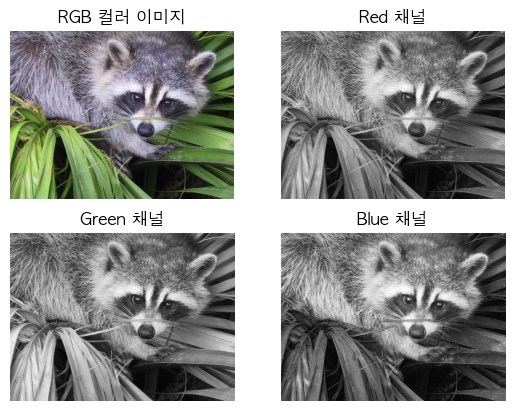

In [ ]:
plt.subplot(221)
plt.imshow(raccoon_face, cmap=plt.cm.gray)  # Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
plt.axis("off")
plt.title("RGB Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄ")

plt.subplot(222)
plt.imshow(raccoon_face[:, :, 0], cmap=plt.cm.gray)  # red Ï±ÑÎÑê Ï∂úÎ†•
plt.axis("off")
plt.title("Red Ï±ÑÎÑê")

plt.subplot(223)
plt.imshow(raccoon_face[:, :, 1], cmap=plt.cm.gray)  # green Ï±ÑÎÑê Ï∂úÎ†•
plt.axis("off")
plt.title("Green Ï±ÑÎÑê")

plt.subplot(224)
plt.imshow(raccoon_face[:, :, 2], cmap=plt.cm.gray)  # blue Ï±ÑÎÑê Ï∂úÎ†•
plt.axis("off")
plt.title("Blue Ï±ÑÎÑê")

plt.show()

### Î≤îÏ£ºÌòï

iris Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïä§ÏπºÎùº Í∞íÏùò Î≤°ÌÑ∞Îäî 4Í∞ÄÏßÄ Î∂óÍΩÉ Ï¢ÖÎ•òÏùò Î≤îÏ£ºÎ•º ÎÇòÌÉÄÎÇ∏Îã§

In [ ]:
# iris.target Ïùò unique

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data = iris['data']
target = iris['target']

In [ ]:
data[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
data.shape, target.shape

((150, 4), (150,))

In [ ]:
np.unique(target) # Ìï®ÏàòÏùò unique Ìïú Í∞íÎßå Ï∂úÎ†•

array([0, 1, 2])

In [ ]:
target[0]

0

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data[100], target[100]

(array([6.3, 3.3, 6. , 2.5]), 2)

ÌïôÏäµÎç∞Ïù¥ÌÑ∞ : Ïã§Ï†úÎç∞Ïù¥ÌÑ∞ + label(target)

### Î®∏Ïã†Îü¨Îãù ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞

ÏòàÏ∏° Î¨∏Ï†úÏùò ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Îäî ÎåÄÎ∂ÄÎ∂Ñ Î≤°ÌÑ∞Î°ú ÌëúÏãúÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥ Ïà´Ïûê Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•Î∞õÏïÑ Ïñ¥Îñ§ Ïà´ÏûêÏù∏ÏßÄ Î∂ÑÎ•òÌïòÎäî Î¨∏Ï†úÎ•º ÏÉùÍ∞ÅÌï¥Î≥¥Ïûê. Ïù¥ÎØ∏ÏßÄÎäî ÏõêÎûò 2Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Ïù¥ÏßÄÎßå ÏòàÏ∏° Î¨∏Ï†úÏóêÏÑúÎäî Î≥¥ÌÜµ 1Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©ÌïúÎã§. Îã§ÏùåÏùÄ ÏÇ¨Ïù¥ÌÇ∑Îü∞ Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî MNIST Ïà´Ïûê Ïù¥ÎØ∏ÏßÄ(digit image) Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥Îã§. Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî 0Î∂ÄÌÑ∞ 9ÍπåÏßÄÏùò Ïà´ÏûêÎ•º ÏÜêÏúºÎ°ú Ïì¥ ÌõÑÏóê 8x8 Ìï¥ÏÉÅÎèÑÏùò Ïù¥ÎØ∏ÏßÄÎ°ú Ïä§Ï∫îÌïú Í≤ÉÏù¥Îã§. 

In [ ]:
from sklearn.datasets import load_digits  # Ìå®ÌÇ§ÏßÄ ÏûÑÌè¨Ìä∏

digits = load_digits()  # Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [ ]:
data = digits['data']
target = digits['target']

In [ ]:
data.shape, target.shape

((1797, 64), (1797,))

In [ ]:
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Îã§Ïùå ÏΩîÎìúÎäî Í∑∏Ï§ë Ïà´Ïûê 0Í≥º 1Ïùò Ïù¥ÎØ∏ÏßÄ 8Í∞úÎ•º Ï∂úÎ†•ÌïúÎã§.

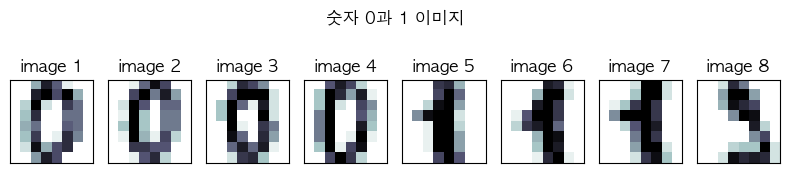

In [ ]:
samples = [0, 10, 20, 30, 1, 11, 21, 31]  # ÏÑ†ÌÉùÎêú Ïù¥ÎØ∏ÏßÄ Î≤àÌò∏
d = []
for i in range(8):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))
plt.suptitle("Ïà´Ïûê 0Í≥º 1 Ïù¥ÎØ∏ÏßÄ")
plt.tight_layout()
plt.show()

Ïù¥ 2Ï∞®Ïõê Ïù¥ÎØ∏ÏßÄÎ•º 64-ÌÅ¨Í∏∞Ïùò 1Ï∞®Ïõê Î≤°ÌÑ∞Î°ú ÌéºÏπòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§. Í∞ôÏùÄ Ïà´ÏûêÏóê ÎåÄÌïú Î≤°ÌÑ∞Í∞Ä ÏÑúÎ°ú ÎãÆÏïòÎã§Îäî Ï†êÏóê Ï£ºÏùòÌïòÎùº.

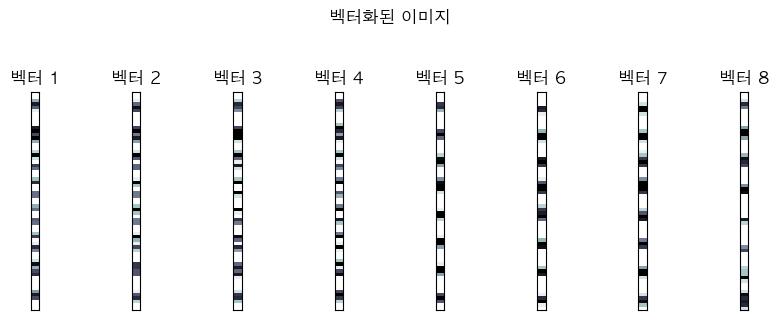

In [ ]:
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # Î≤°ÌÑ∞Ìôî
    
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4, interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("Î≤°ÌÑ∞ {}".format(i + 1))
plt.suptitle("Î≤°ÌÑ∞ÌôîÎêú Ïù¥ÎØ∏ÏßÄ", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()

## [2] Ï†ÑÏπò Ïó∞ÏÇ∞

Ïù¥Î≤àÏóêÎäî Ïù¥Îü¨Ìïú Ïä§ÏπºÎùº, Î≤°ÌÑ∞, ÌñâÎ†¨ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌòïÏãúÌÇ§Îäî Î∞©Î≤ï Ï¶â, Ïó∞ÏÇ∞(operation)Ïóê ÎåÄÌï¥ÏÑú ÏïåÏïÑÎ≥¥Ïûê.

Ï†ÑÏπò(transpose) Ïó∞ÏÇ∞ÏùÄ ÌñâÎ†¨ÏóêÏÑú Í∞ÄÏû• Í∏∞Î≥∏Ïù¥ ÎêòÎäî Ïó∞ÏÇ∞ÏúºÎ°ú ÌñâÎ†¨Ïùò ÌñâÍ≥º Ïó¥ÏùÑ Î∞îÍæ∏Îäî Ïó∞ÏÇ∞ÏùÑ ÎßêÌïúÎã§. Ï†ÑÏπò Ïó∞ÏÇ∞ÏùÄ Î≤°ÌÑ∞ÎÇò ÌñâÎ†¨Ïóê TÎùºÎäî ÏúÑÏ≤®Ïûê(superscript)Î•º Î∂ôÏó¨ÏÑú ÌëúÍ∏∞ÌïúÎã§. Ï±ÖÏóê Îî∞ÎùºÏÑúÎäî ÌîÑÎùºÏûÑ(prime)Í∏∞Ìò∏ ‚Ä≤Î•º Î∂ôÏù¥Îäî Í≤ΩÏö∞ÎèÑ ÏûàÎã§.

xÎ•º Ï†ÑÏπòÏó∞ÏÇ∞ÌïòÎ©¥

$$
x \rightarrow x^T \\
\text{or}\\
x \rightarrow x^{'}
$$

6√ó4 Ï∞®ÏõêÏùò ÌñâÎ†¨ÏùÑ Ï†ÑÏπò Ïó∞ÏÇ∞ÌïòÎ©¥ 4√ó6 Ï∞®ÏõêÏùò ÌñâÎ†¨Ïù¥ ÎêúÎã§.

$$
X = \begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} \\
x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4} \\
x_{3,1} & x_{3,2} & x_{3,3} & x_{3,4} \\
x_{4,1} & x_{4,2} & x_{4,3} & x_{4,4} \\
x_{5,1} & x_{5,2} & x_{5,3} & x_{5,4} \\
x_{6,1} & x_{6,2} & x_{6,3} & x_{6,4}
\end{bmatrix}
\longrightarrow
X^T = \begin{bmatrix}
x_{1,1} & x_{2,1} & x_{1,3} & x_{1,4} & x_{1,5} & x_{1,6}\\
x_{1,2} & x_{2,2} & x_{2,3} & x_{2,4} & x_{2,5} & x_{2,6}\\
x_{1,3} & x_{2,3} & x_{3,3} & x_{3,4} & x_{3,5} & x_{3,6} \\
x_{1,4} & x_{2,4} & x_{4,3} & x_{4,4} & x_{4,5} & x_{4,6}
\end{bmatrix}
$$

Ï†ÑÏπò Ïó∞ÏÇ∞ÏúºÎ°ú ÎßåÎì† ÌñâÎ†¨ÏùÑ ÏõêÎûò ÌñâÎ†¨Ïóê ÎåÄÌïú **Ï†ÑÏπòÌñâÎ†¨**Ïù¥ÎùºÍ≥† ÌïúÎã§. (Ïó¥)Î≤°ÌÑ∞ xÏóê ÎåÄÌï¥ Ï†ÑÏπò Ïó∞ÏÇ∞ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÎßåÎì† $x^T$ Îäî ÌñâÏùò ÏàòÍ∞Ä 1Ïù∏ ÌñâÎ†¨Ïù¥ÎØÄÎ°ú **Ìñâ Î≤°ÌÑ∞(row vector)**ÎùºÍ≥† ÌïúÎã§.

$$
x = \begin{bmatrix}
x_{1} \\ x_{2}\\ x_{3}\\ x_{4}
\end{bmatrix}
\longrightarrow
x^T = \begin{bmatrix}
x_{1} & x_{2} & x_{3} & x_{4}
\end{bmatrix}
$$

NumPyÏóêÏÑúÎäî ndarray Í∞ùÏ≤¥Ïùò TÎùºÎäî ÏÜçÏÑ±ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ï†ÑÏπò ÌñâÎ†¨ÏùÑ Íµ¨ÌïúÎã§. Ïù¥Îïå TÎäî Î©îÏÑúÎìú(method)Í∞Ä ÏïÑÎãå ÏÜçÏÑ±(attribute)Ïù¥ÎØÄÎ°ú ÏÜåÍ¥ÑÌò∏ ()Î•º Î∂ôÏó¨ÏÑú Ìò∏Ï∂úÌïòÎ©¥ Ïïà ÎêúÎã§.

In [ ]:
x1 = np.array([[5.1], [3.5], [1.4], [0.2]])
x1, x1.shape

(array([[5.1],
        [3.5],
        [1.4],
        [0.2]]),
 (4, 1))

numpy & pandasÏóêÏÑú Ï†ÑÏπò Ïó∞ÏÇ∞ÏùÄ '.T', 'np.transpose()', 'pd.transpose()'

In [ ]:
# x1Ïùò Ï†ÑÏπò
x1.T, x1.shape

(array([[5.1, 3.5, 1.4, 0.2]]), (4, 1))

Îã§Îßå 1Ï∞®Ïõê ndarrayÎäî Ï†ÑÏπò Ïó∞ÏÇ∞Ïù¥ Ï†ïÏùòÎêòÏßÄ ÏïäÎäîÎã§.

In [ ]:
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1, x1.shape

(array([5.1, 3.5, 1.4, 0.2]), (4,))

In [ ]:
# x1Ïùò Ï†ÑÏπò
x1.T, x1.shape

(array([5.1, 3.5, 1.4, 0.2]), (4,))

## [3] ÌñâÎ†¨Ïùò Ìñâ ÌëúÍ∏∞Î≤ïÍ≥º Ïó¥ ÌëúÍ∏∞Î≤ï

Ï†ÑÏπò Ïó∞ÏÇ∞Í≥º Ìñâ Î≤°ÌÑ∞, Ïó¥ Î≤°ÌÑ∞Î•º Ïù¥Ïö©ÌïòÎ©¥ Îã§ÏùåÏ≤òÎüº ÌñâÎ†¨ÏùÑ Î≥µÏàòÏùò Ïó¥ Î≤°ÌÑ∞ $c_i$, ÎòêÎäî Î≥µÏàòÏùò Ìñâ Î≤°ÌÑ∞ $r_j^T$ ÏùÑ Ìï©Ïπú(concatenated) ÌòïÌÉúÎ°ú ÌëúÍ∏∞Ìï† ÏàòÎèÑ ÏûàÎã§.



$$
x = \begin{bmatrix}
c_{1} & c_{2} & \cdots & c_{M}
\end{bmatrix}
= \begin{bmatrix}
r_{1}^T \\ r_{2}^T \\ \vdots \\ r_{M}^T
\end{bmatrix}
$$

ÏúÑ ÏãùÏóêÏÑú ÌñâÎ†¨Í≥º Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞Îäî Îã§ÏùåÍ≥º Í∞ôÎã§.

$$
X \in R^{N\times M} \\
C_{i} \in R^{N\times 1}\ (i = 1, \cdots, M) \\
r_{j}^T \in R^{1\times M}\ (i = 1, \cdots, N)$$

ÏúÑÏùò ÏãùÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ Î™ÖÏ†úÎ•º ÏàòÏãùÏúºÎ°ú ÌëúÌòÑÌïú Í≤ÉÏù¥Îã§.

> ‚ÄúÌñâÎ†¨ XÏùò Í∞Å Ïó¥ÏùÄ c1, c2, ‚Ä¶, cMÎùºÍ≥† Ïù¥Î¶Ñ Î∂ôÏù∏Îã§.‚Äù

ÎòêÎäî

> ‚ÄúÌñâÎ†¨ XÎäî Ïó¥ Î≤°ÌÑ∞ c1, c2, ‚Ä¶, cMÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎã§.‚Äù

Ìñâ Í¥ÄÏ†êÏóêÏÑúÎäî

> ‚ÄúÌñâÎ†¨ XÏùò Í∞Å ÌñâÏùÄ $r_1^T, r_2^T, \cdots, r_N^T$ÎùºÍ≥† Ïù¥Î¶Ñ Î∂ôÏù∏Îã§.‚Äù

ÎòêÎäî

> ‚ÄúÌñâÎ†¨ XÎäî Ìñâ Î≤°ÌÑ∞ $r_1^T, r_2^T, \cdots, r_N^T$ÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎã§.‚Äù


Î™®Îì† Î≤°ÌÑ∞Îäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ïó¥Î≤°ÌÑ∞Ïù¥ÎØÄÎ°ú riÎ•º Ï†ÑÏπò Ïó∞ÏÇ∞ÌïòÏó¨ rTiÎùºÍ≥† ÌñâÏùÑ ÌëúÌòÑÌïú Ï†êÏóê Ï£ºÏùòÌïúÎã§.

ÏòàÎ•º Îì§Ïñ¥ ÌñâÎ†¨

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

ÏùÄ Ïó¥Î≤°ÌÑ∞

$$
c_1 = \begin{bmatrix}1 \\ 4\end{bmatrix},
c_2 = \begin{bmatrix}2 \\ 5\end{bmatrix},
c_1 = \begin{bmatrix}3 \\ 6\end{bmatrix}
$$

Ïù¥ Ìï©Ï≥êÏßÑ Í≤ÉÏù¥ÎùºÍ≥† Î≥¥Í±∞ÎÇò ÎòêÎäî Ìñâ Î≤°ÌÑ∞


$$
r_1 = \begin{bmatrix}1 & 2& 3\end{bmatrix}^T, r_2 = \begin{bmatrix}4 & 5 & 6\end{bmatrix}^T
$$

Î°ú Íµ¨ÏÑ±ÎêòÏóàÎã§Í≥† Î≥º Ïàò ÏûàÎã§.



## [4] ÌäπÏàòÌïú Î≤°ÌÑ∞ÏôÄ ÌñâÎ†¨

Î™á Í∞ÄÏßÄ ÌäπÏàòÌïú Î≤°ÌÑ∞ÏôÄ ÌñâÎ†¨ÏùÄ Î≥ÑÎèÑÏùò Í∏∞Ìò∏ÎÇò Ïù¥Î¶ÑÏù¥ Î∂ôÎäîÎã§.



### ÏòÅÎ≤°ÌÑ∞

Î™®Îì† ÏõêÏÜåÍ∞Ä 0Ïù∏ NÏ∞®Ïõê Î≤°ÌÑ∞Îäî **ÏòÅÎ≤°ÌÑ∞(zeros-vector)**ÎùºÍ≥† ÌïòÎ©∞ Îã§ÏùåÏ≤òÎüº ÌëúÍ∏∞ÌïúÎã§.

Î™®Îì† ÏõêÏÜåÍ∞Ä 0Ïù∏ NÏ∞®Ïõê Î≤°ÌÑ∞Îäî

$$0_N = \mathbf{0} = 0 = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0\end{bmatrix} \\
0 \in R^{N\times 1}
$$

Î¨∏Îß•ÏóêÏÑú Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞Î•º Ïïå Ïàò ÏûàÏùÑ ÎïåÎäî ÌÅ¨Í∏∞Î•º ÎÇòÌÉÄÎÇ¥Îäî ÏïÑÎûòÏ≤®ÏûêÎ•º ÏÉùÎûµÌï† Ïàò ÏûàÎã§.

NumPyÏóêÏÑú ÏòÅÎ≤°ÌÑ∞Îäî zeros() Î™ÖÎ†πÏúºÎ°ú ÎßåÎì†Îã§.

In [ ]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### ÏùºÎ≤°ÌÑ∞

Î™®Îì† ÏõêÏÜåÍ∞Ä 1Ïù∏ NÏ∞®Ïõê Î≤°ÌÑ∞Îäî **ÏùºÎ≤°ÌÑ∞(ones-vector)**ÎùºÍ≥† ÌïòÎ©∞ Îã§ÏùåÏ≤òÎüº ÌëúÍ∏∞ÌïúÎã§.


$$
1_N = 1 = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1\end{bmatrix} \\
1 \in R^{N\times 1}
$$

ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Î¨∏Îß•ÏúºÎ°ú Î≤°ÌÑ∞Ïùò ÌÅ¨Í∏∞Î•º Ïïå Ïàò ÏûàÏùÑ ÎïåÎäî ÌÅ¨Í∏∞Î•º ÎÇòÌÉÄÎÇ¥Îäî ÏïÑÎûò Ï≤®Ïûê NÏùÑ ÏÉùÎûµÌï† Ïàò ÏûàÎã§.

NumPyÏóêÏÑú ÏùºÎ≤°ÌÑ∞Îäî ones() Î™ÖÎ†πÏúºÎ°ú ÎßåÎì†Îã§.

In [ ]:
np.ones((4, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Ï†ïÎ∞©ÌñâÎ†¨ Square matrix

ÌñâÏùò ÌÅ¨Í∏∞ÏôÄ Ïó¥Ïùò ÌÅ¨Í∏∞Í∞Ä Í∞ôÏùÄ ÌñâÎ†¨,

$ X = \begin{pmatrix} 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1\end{pmatrix} $



### ÎåÄÍ∞ÅÌñâÎ†¨

ÌñâÎ†¨ÏóêÏÑú ÌñâÍ≥º Ïó¥Ïù¥ Í∞ôÏùÄ ÏúÑÏπòÎ•º Ï£º ÎåÄÍ∞Å(main diagonal) ÎòêÎäî Í∞ÑÎã®Ìûà **ÎåÄÍ∞Å(diagonal)**Ïù¥ÎùºÍ≥† ÌïúÎã§. ÎåÄÍ∞Å ÏúÑÏπòÏóê ÏûàÏßÄ ÏïäÏùÄ Í≤ÉÎì§ÏùÄ **ÎπÑÎåÄÍ∞Å(off-diagonal)**Ïù¥ÎùºÍ≥† ÌïúÎã§. Î™®Îì† ÎπÑÎåÄÍ∞Å ÏöîÏÜåÍ∞Ä 0Ïù∏ ÌñâÎ†¨ÏùÑ **ÎåÄÍ∞ÅÌñâÎ†¨(diagonal matrix)**Ïù¥ÎùºÍ≥† ÌïúÎã§.

$$ 
D = \begin{bmatrix} d_{1} & 0 & \cdots & 0 \\ 
0 & d_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & d_{N} \end{bmatrix}\\
D \in R^{NxN}
$$


ÎåÄÍ∞ÅÌñâÎ†¨Ïù¥ ÎêòÎ†§Î©¥ ÎπÑÎåÄÍ∞ÅÏÑ±Î∂ÑÏù¥ 0Ïù¥Í∏∞Îßå ÌïòÎ©¥ ÎêòÍ≥† ÎåÄÍ∞ÅÏÑ±Î∂ÑÏùÄ 0Ïù¥Îì† ÏïÑÎãàÎì† ÏÉÅÍ¥ÄÏóÜÎã§. ÎòêÌïú Î∞òÎìúÏãú Ï†ïÎ∞©ÌñâÎ†¨Ïùº ÌïÑÏöîÎèÑ ÏóÜÎã§. 

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20221124161458/dm.jpg' width=300>

NumPyÎ°ú ÎåÄÍ∞Å Ï†ïÎ∞©ÌñâÎ†¨ÏùÑ ÏÉùÏÑ±ÌïòÎ†§Î©¥ diag() Î™ÖÎ†πÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

In [ ]:
np.diag((10, -9, 0, 1, 3))

array([[10,  0,  0,  0,  0],
       [ 0, -9,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  3]])

### Ìï≠Îì±ÌñâÎ†¨, Îã®ÏúÑÌñâÎ†¨ Identity matrix

ÎåÄÍ∞ÅÌñâÎ†¨ Ï§ëÏóêÏÑúÎèÑ Î™®Îì† ÎåÄÍ∞ÅÏÑ±Î∂ÑÏùò Í∞íÏù¥ 1Ïù∏ ÎåÄÍ∞ÅÌñâÎ†¨ÏùÑ **Ìï≠Îì±ÌñâÎ†¨(identity matrix)**Ïù¥ÎùºÍ≥† ÌïúÎã§. Ìï≠Îì±ÌñâÎ†¨ÏùÄ Î≥¥ÌÜµ ÏïåÌååÎ≤≥ ÎåÄÎ¨∏Ïûê IÎ°ú ÌëúÍ∏∞ÌïúÎã§.


$$
I = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \\
I \in R^{N\times N}
$$

Îã®ÏúÑÌñâÎ†¨ÏùÄ Ìï≠Îì±ÌñâÎ†¨Ïù¥ÎùºÍ≥† ÌïúÎã§. Í∑∏Îü¨ÎØÄÎ°ú Îã®ÏúÑÌñâÎ†¨ÏùÄ ÎåÄÍ∞ÅÌñâÎ†¨ Diagonal Ïù¥Í∏∞ÎèÑ ÌïòÎã§.

NumPyÎ°ú Ìï≠Îì±ÌñâÎ†¨ÏùÑ ÏÉùÏÑ±ÌïòÎ†§Î©¥ identity() ÌòπÏùÄ eye() Î™ÖÎ†πÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

In [ ]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### ÎåÄÏπ≠ÌñâÎ†¨

ÎßåÏïΩ Ï†ÑÏπòÏó∞ÏÇ∞ÏùÑ ÌÜµÌï¥ÏÑú ÏñªÏùÄ Ï†ÑÏπòÌñâÎ†¨Í≥º ÏõêÎûòÏùò ÌñâÎ†¨Ïù¥ Í∞ôÏúºÎ©¥ **ÎåÄÏπ≠ÌñâÎ†¨(symmetric matrix)**Ïù¥ÎùºÍ≥† ÌïúÎã§. Ï†ïÎ∞©ÌñâÎ†¨Îßå ÎåÄÏπ≠ÌñâÎ†¨Ïù¥ Îê† Ïàò ÏûàÎã§.



$S^{T}\quad =\quad S$

$S\quad =\quad { S }^{ NxM }$




### Ïó∞Ïäµ Î¨∏Ï†ú

1. ÏòÅÎ≤°ÌÑ∞, ÏùºÎ≤°ÌÑ∞, Ï†ïÎ∞©ÌñâÎ†¨, ÎåÄÍ∞ÅÌñâÎ†¨, Ìï≠Îì±ÌñâÎ†¨, ÎåÄÏπ≠ÌñâÎ†¨Ïùò ÏòàÎ•º ÌïòÎÇòÏî© ÎßåÎì§Ïñ¥Î≥∏Îã§.

2. ÏúÑÏùò Î≤°ÌÑ∞ÏôÄ ÌñâÎ†¨ÏùÑ NumPyÎ°ú ÎÇòÌÉÄÎÇ¥ Î≥∏Îã§.


## [5] Î≤îÏ£ºÏûêÎ£åÌòïÏùò ÏöîÏïΩ

- **ÎèÑÏàò Î∂ÑÌè¨(Frequency distribution)**
  - ÎèÑÏàò(Frequency) : Í∞Å Î≤îÏ£ºÏóê ÏÜçÌïòÎäî Í¥ÄÏ∏°Í∞íÏùò Í∞úÏàò
    - `value_counts()`
  - ÏÉÅÎåÄ ÎèÑÏàò(Relative frequency) : ÎèÑÏàòÎ•º ÏûêÎ£åÏùò Ï†ÑÏ≤¥ Í∞úÏàòÎ°ú ÎÇòÎàà ÎπÑÏú®
    - `(Í∑∏ ÎèÑÏàòÏùò Î≥ÄÎüâ)/(Ï¥ùÎèÑÏàò)`
    - `value_counts(normalize=True)`
  - ÎèÑÏàò Î∂ÑÌè¨Ìëú(Frequency table) : Î≤îÏ£ºÌòï ÏûêÎ£åÏóêÏÑú Î≤îÏ£ºÏôÄ Í∑∏ Î≤îÏ£ºÏóê ÎåÄÏùëÌïòÎäî ÎèÑÏàò, ÏÉÅÎåÄ ÎèÑÏàòÎ•º ÎÇòÏó¥Ìï¥ ÌëúÎ°ú ÎßåÎì† Í≤É
- **ÎßâÎåÄ Í∑∏ÎûòÌîÑ(Bar chart)** : Í∞Å Î≤îÏ£ºÏóêÏÑú ÎèÑÏàòÏùò ÌÅ¨Í∏∞Î•º ÎßâÎåÄÎ°ú Í∑∏Î¶º
  - `plt.bar()`



#### ÎèÑÏàò Î∂ÑÌè¨Ìëú


In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [ ]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [ ]:
df['species'] = target

In [ ]:
# species Î•º target Ïù¥Î¶ÑÏúºÎ°ú ÏπòÌôò
df['species_name'] = df['species'].map({i:name for i , name in enumerate(iris.target_names)})
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa

In [ ]:
df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species species_name  
145        2    virginica  
146        2    virginica  
147        2    virginica  
148        2    virginica  
149        2    virginica

Í∞Å Ï¢ÖÎ•òÎ≥Ñ ÎèÑÏàòÎ∂ÑÌè¨ÌëúÎ•º Ï∂úÎ†•ÌïúÎã§

In [ ]:
# value counts Í∞íÏùò Í∞úÏàò Íµ¨ÌïòÍ∏∞
species_counts = df['species_name'].value_counts()
species_counts

species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'iris species')

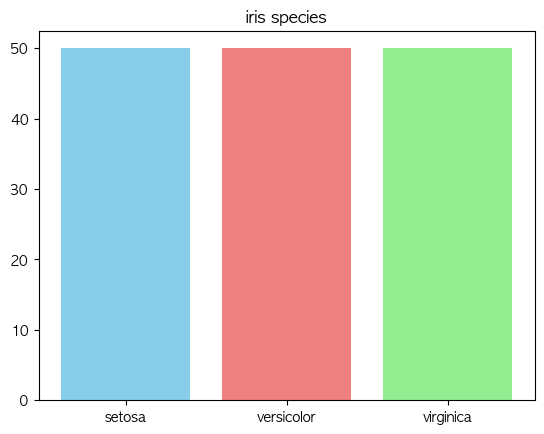

In [ ]:
# bar chart for value counts
plt.bar(species_counts.index, species_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('iris species')

---

ÌäπÏ†ï Ï¢ÖÎ•òÏùò ÎèÑÏàòÎ•º Ï∞æÎäîÎã§

In [ ]:
# species 0Ïùò value counts



In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_name'],
      dtype='object')

Ïó∞ÏÜçÎêú Í∞íÏùÑ pd.cut()ÏùÑ Ïù¥Ïö©Ìï¥ÏÑú sepal length (cm) Î•º 5Í∞ú Íµ¨Í∞ÑÌôîÌï¥ÏÑú ÎèÑÏàòÎ∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥ Î≥¥Ïûê.

In [ ]:
sepal_length = pd.cut(df['sepal length (cm)'], bins=5)
sepal_length

0       (5.02, 5.74]
1      (4.296, 5.02]
2      (4.296, 5.02]
3      (4.296, 5.02]
4      (4.296, 5.02]
           ...      
145     (6.46, 7.18]
146     (5.74, 6.46]
147     (6.46, 7.18]
148     (5.74, 6.46]
149     (5.74, 6.46]
Name: sepal length (cm), Length: 150, dtype: category
Categories (5, interval[float64, right]): [(4.296, 5.02] < (5.02, 5.74] < (5.74, 6.46] < (6.46, 7.18] < (7.18, 7.9]]

Íµ¨Í∞ÑÎ≥Ñ ÎèÑÏàòÎ∂ÑÌè¨Ìëú

In [ ]:
sepal_length.value_counts().sort_index()

sepal length (cm)
(4.296, 5.02]    32
(5.02, 5.74]     41
(5.74, 6.46]     42
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: count, dtype: int64

Ïñ¥Îñ§ Î≤îÏúÑÏùò ÎèÑÏàòÎ∂ÑÌè¨Ìëú

In [ ]:
petal_width_bins = pd.cut(df['petal width (cm)'], bins=[0, 0.5, df['petal width (cm)'].max()], labels=['< 0.5cm', '>= 0.5cm'], right=True)
petal_width_counts = petal_width_bins.value_counts().sort_index()
petal_width_counts

petal width (cm)
< 0.5cm      49
>= 0.5cm    101
Name: count, dtype: int64

<BarContainer object of 2 artists>

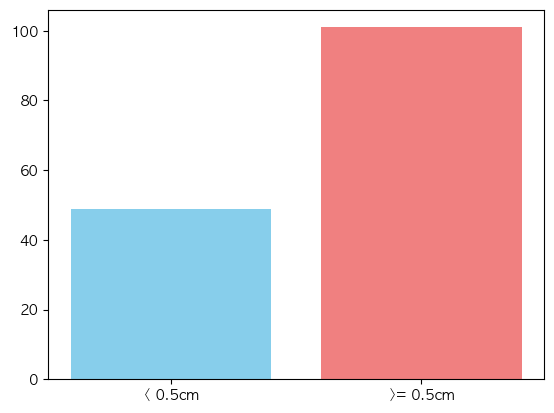

In [ ]:
plt.bar(petal_width_counts.index, petal_width_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])

## [6] ÏàòÏπòÌòï ÏûêÎ£åÏùò ÏöîÏïΩ

Î≤îÏ£ºÌòï ÏûêÎ£åÏôÄ Îã¨Î¶¨ ÏàòÏπòÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÍ∏∞Ïóê ÌÜµÍ≥ÑÍ∞íÏùÑ ÏÇ¨Ïö©Ìïú ÏöîÏïΩÏù¥ Í∞ÄÎä•ÌïòÎã§.


- **ÌèâÍ∑†(Mean)** : Í¥ÄÏ∏°Í∞íÏùò ÏÇ∞Ïà†ÌèâÍ∑†
  - `np.mean()`
- **Î∂ÑÏÇ∞(Variance)** : Í∞Å Í¥ÄÏ∏°Í∞íÏù¥ ÏûêÎ£åÏùò ÌèâÍ∑†ÏúºÎ°úÎ∂ÄÌÑ∞ Îñ®Ïñ¥ÏßÑ Ï†ïÎèÑ (ÏûêÎ£åÍ∞Ä ÏñºÎßàÎÇò Ìù©Ïñ¥Ï°åÎäîÏßÄ Ïà´ÏûêÎ°ú ÌëúÌòÑ)
  ```
  from statistics import variance
  variance()
  ```
- **ÌëúÏ§ÄÌé∏Ï∞®(Standard deviation, s)** : Î∂ÑÏÇ∞Ïùò ÏñëÏùò Ï†úÍ≥±Í∑º
  ```
  from statistics import stdev
  stdev()
  ```
- **ÌûàÏä§ÌÜ†Í∑∏Îû®(Histogram)** : ÏàòÏπòÌòï ÏûêÎ£åÎ•º ÏùºÏ†ïÌïú Î≤îÏúÑÎ•º Í∞ñÎäî Î≤îÏ£ºÎ°ú ÎÇòÎàÑÍ≥† ÎßâÎåÄ Í∑∏ÎûòÌîÑÏôÄ Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú Í∑∏Î¶º
  - `plt.hist()`
  - xÏ∂ïÏùÄ Í≥ÑÍ∏â, yÏ∂ïÏùÄ ÎπàÎèÑ(ÎèÑÏàò, ÏÉÅÎåÄ ÎèÑÏàò)
  - ÎèÑÏàòÎ•º ÎπÑÍµêÌï† Îïå, Î≤îÏ£ºÌòï ÏûêÎ£åÎäî ÎßâÎåÄ Í∑∏ÎûòÌîÑ, ÏàòÏπòÌòï ÏûêÎ£åÎäî ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Ïì¥Îã§.

In [ ]:
# species 1 Ïùò ÌèâÍ∑†

df[df['species'] == 1][df.columns[:-2]].mean()

sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4.260
petal width (cm)     1.326
dtype: float64

In [ ]:
# species 1 Ïùò Î∂ÑÏÇ∞

df[df['species'] == 1][df.columns[:-2]].var()

sepal length (cm)    0.266433
sepal width (cm)     0.098469
petal length (cm)    0.220816
petal width (cm)     0.039106
dtype: float64

In [ ]:
# species 1 Ïùò ÌëúÏ§ÄÌé∏Ï∞®

df[df['species'] == 1][df.columns[:-2]].std()

sepal length (cm)    0.516171
sepal width (cm)     0.313798
petal length (cm)    0.469911
petal width (cm)     0.197753
dtype: float64

In [ ]:
feature = df[df['species'] == 1][df.columns[:-2]]
feature[:10]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                7.0               3.2                4.7               1.4
51                6.4               3.2                4.5               1.5
52                6.9               3.1                4.9               1.5
53                5.5               2.3                4.0               1.3
54                6.5               2.8                4.6               1.5
55                5.7               2.8                4.5               1.3
56                6.3               3.3                4.7               1.6
57                4.9               2.4                3.3               1.0
58                6.6               2.9                4.6               1.3
59                5.2               2.7                3.9               1.4

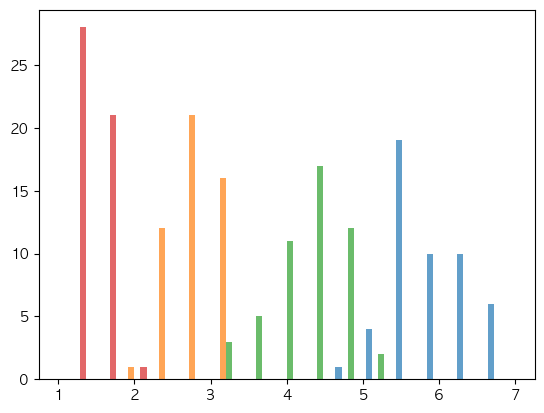

In [ ]:
plt.hist(feature, bins=15, alpha=0.7) # bins Í∞úÏàò Ï°∞Ï†ï Í∞ÄÎä•
plt.show()

Î™®Îì† Ï¢ÖÎ•ò Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Í∑∏Î¶∞Îã§.

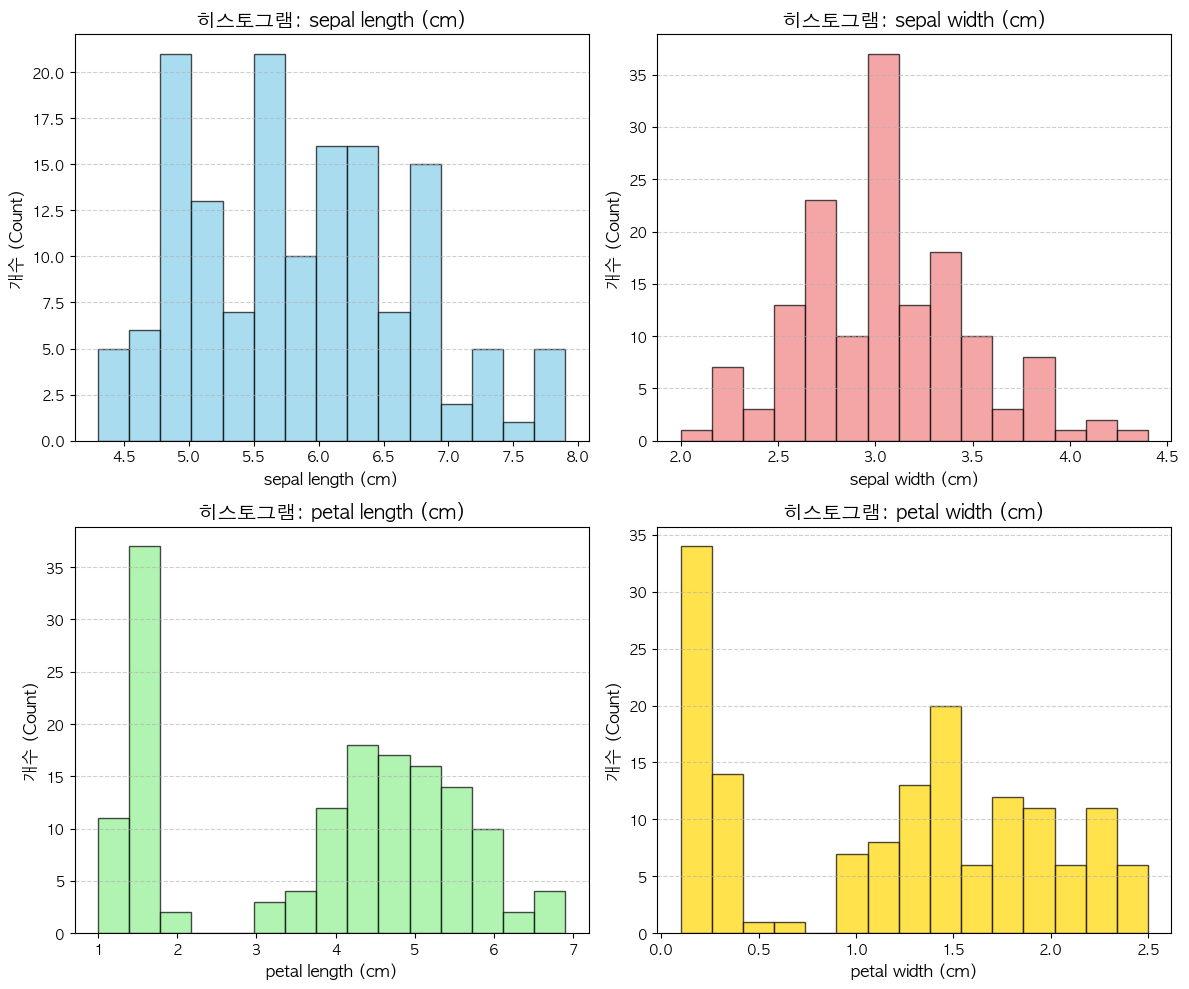

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten() # 2x2 Î∞∞Ïó¥ÏùÑ 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÌèâÌÉÑÌôîÌïòÏó¨ ÏâΩÍ≤å Ï†ëÍ∑º

# Í∞Å ÌäπÏÑ±Ïóê ÎåÄÌïú ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
features = iris.feature_names
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, feature in enumerate(features):
    ax = axes[i] # ÌòÑÏû¨ ÏÑúÎ∏åÌîåÎ°Ø ÏÑ†ÌÉù
    ax.hist(df[feature], bins=15, color=colors[i], edgecolor='black', alpha=0.7) # bins Í∞úÏàò Ï°∞Ï†ï Í∞ÄÎä•
    ax.set_title(f'ÌûàÏä§ÌÜ†Í∑∏Îû®: {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Í∞úÏàò (Count)', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# ÏÑúÎ∏åÌîåÎ°Ø Í∞ÑÏùò Í∞ÑÍ≤© Ï°∞Ï†ï
plt.tight_layout()

# "Ïã§Ïäµ": BMI Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞


### Î®∏Ïã†Îü¨Îãù ÌïôÏäµ Ï§ÄÎπÑ

Í∏∞Í≥Ñ ÌïôÏäµÏùÄ Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÎ≥¥Î•º Ïú†Ï∂îÌï† Ïàò ÏûàÎèÑÎ°ù ÌïúÎã§. Ïù¥Îü¨Ìïú Í∏∞Í≥Ñ ÌïôÏäµÏùÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌÅ¨Í≤å Î™á Îã®Í≥ÑÎ°ú ÎÇòÎàå Ïàò ÏûàÎã§. Ïó¨Í∏∞ÏóêÏÑúÎäî ÌÅ¨Í≤å 3 Îã®Í≥ÑÎ°ú ÎÇòÎàÑÏñ¥ Î≥¥Í≤†Îã§.

 1. Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ Î∞è Ïù¥Ìï¥
 1. Î™®Îç∏Ïùò ÌïôÏäµ
 1. Î™®Îç∏Ïùò ÌèâÍ∞Ä

Í∞ÄÏû• Î®ºÏ†Ä Ìï† ÏùºÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Ï∂©Î∂ÑÌïú Ïù¥Ìï¥ÌïòÎäî Í≤ÉÏù¥Îã§. Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ìï¥Ìï¥ Ïú†Ìö®Ìïú Îç∞Ïù¥ÌÑ∞ÏôÄ Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÌåêÎã®ÌïúÎã§. Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏÉÅÌï† Í∏∞Î≤ïÏùÑ ÏÑ†ÌÉùÌïúÎã§. ÌïòÏßÄÎßå ÎÑàÎ¨¥ Î∂ÄÎã¥ÏùÑ Í∞ÄÏßà ÌïÑÏöîÎäî ÏóÜÎã§. ÏûòÎ™ªÎêú ÌåêÎã®Ïù¥ÏßÄÎßå ÎÇòÏ§ëÏóê Ï¢Ä Îçî ÎÇòÏùÄ Í≤∞Í≥ºÎ•º ÏñªÍ≤å ÌïòÎäî Í≥ÑÍ∏∞Í∞Ä Îê† Ïàò ÏûàÎã§. ÌååÏù¥Ïç¨ÏùÄ Îπ†Î•¥Í≥† ÏâΩÍ≤å Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨Ìï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê ÌÅ∞ Î¨∏Ï†úÍ∞Ä ÎêòÏßÄ ÏïäÎäîÎã§. Ïù¥Îü¨Ìïú ÌäπÏßï ÎïåÎ¨∏Ïóê ÌååÏù¥Ïç¨ÏùÑ ÏÑ†ÌÉùÌïòÍ∏∞ÎèÑ ÌïúÎã§.

Îã§ÏùåÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÎäî Îã®Í≥ÑÎã§. Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏû• Ïûò Ï∂îÏÉÅÌôî Ìï† Ïàò ÏûàÎäî Í∏∞Î≤ïÏùÑ ÏÑ†ÌÉùÌïòÏó¨ Í∏∞Í≥ÑÎ•º ÌïôÏäµÌïúÎã§. Ïã†Í≤ΩÎßù(neural network), ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†(support vector machine), KÌèâÍ∑†(KMeans)Îì± Îã§ÏñëÌïú Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïúÎã§. Î™®Îç∏ÏóêÎäî Îã§Î•∏ Îß§Í∞ú Î≥ÄÏàò(parameter)Í∞Ä ÏûàÎã§. ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÏôÄ Î™®Îç∏Ïù¥ Í∞ôÎçîÎùºÎèÑ Îß§Í∞ú Î≥ÄÏàòÎ•º Î≥ÄÍ≤ΩÌï¥ Îã§Î•∏ Í≤∞Í≥ºÎ•º ÏñªÏùÑ ÏàòÎèÑ ÏûàÎã§.

ÎßàÏßÄÎßâÏúºÎ°ú ÌïôÏäµÌïú Î™®Îç∏Ïùò ÌèâÍ∞ÄÍ∞Ä ÌïÑÏöîÌïòÎã§. Îã§ÏñëÌïú Î™®Îç∏Í≥º Í∞Å Î™®Îç∏Ïùò Ïó¨Îü¨ Ï°∞Í±¥ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°Ìï† Ïàò ÏûàÍ≥†, Ïù¥ ÏòàÏ∏°Ïù¥ ÏñºÎßàÎÇò Ï†ïÌôïÌïúÏßÄ ÌèâÍ∞ÄÌï¥Ïïº Îçî ÎÇòÏùÄ Î™®Îç∏Ïù¥ÎÇò Í∏∞Î≤ïÏùÑ ÏÑ†ÌÉùÌï† Ïàò ÏûàÎã§.

Í∏∞Í≥Ñ ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌïôÏäµÌïòÎäî Î∞©Î≤ïÏóê Îî∞Îùº ÌÅ¨Í≤å Îëê Í∞ÄÏßÄÎ°ú ÎÇòÎàå Ïàò ÏûàÎã§. ÏßÄÎèÑ ÌïôÏäµ(supervised learning)ÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê ÏòàÏ∏°ÌïòÍ≥†Ïûê ÌïòÎäî Î™©Ï†Å ÏÜçÏÑ±(target feature)Ïù¥ ÏûàÏñ¥ ÏòàÏ∏° Î™®Îç∏(predictive model)ÏùÑ Íµ¨Ï∂ïÌïúÎã§. ÌïòÏßÄÎßå ÎπÑÏßÄÎèÑ ÌïôÏäµ(unsupervised learning)ÏùÄ Î™©Ï†Å ÏÜçÏÑ± ÏóÜÏù¥ Í∏∞Ïà† Î™®Îç∏(descriptive model)ÏùÑ Íµ¨Ï∂ïÌïúÎã§. Ï†ÑÏûêÏùò ÎåÄÌëúÏ†ÅÏù∏ ÏòàÎäî Ïä§Ìå∏ Î©îÏùº Î∂ÑÎ•òÎã§. Ïä§Ìå∏ Î©îÏùºÍ≥º ÌñÑ Î©îÏùº(Ï†ïÏÉÅ Î©îÏùº)Î°ú Íµ¨Î∂ÑÌï† Ïàò ÏûàÎäî Î™©Ï†Å ÏÜçÏÑ±ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† ÌïôÏäµÌïú ÌõÑ Ïä§Ìå∏ Î©îÏùºÏùÑ Î∂ÑÎ•òÌïúÎã§. ÌõÑÏûêÏùò ÏòàÎäî ÏòÅÌôî Ï∂îÏ≤úÍ≥º Í∞ôÏù¥ ÎÇòÏôÄ Í∏∞Ìò∏Í∞Ä Í∞ôÏùÄ ÏÇ¨Ïö©ÏûêÍ∞Ä Î≥∏ ÏòÅÌôîÎ•º Ï∞æÏïÑ Ï∂îÏ≤úÌï¥ Ï£ºÎäî ÏãúÏä§ÌÖúÏù¥Îã§. 

### BMI 2ÎßåÎ™Ö Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞

BMI Í≥ÑÏÇ∞


Î¨¥ÏûëÏúÑÎ°ú 2ÎßåÎ™ÖÏùò ÌÇ§, Î™∏Î¨¥Í≤å Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì§Í≥†, ÎπÑÎßåÎèÑ Í≥ÑÏÇ∞Ïù∏ BMIÎ•º ÌôúÏö©Ìï¥ÏÑú Ï†ÄÏ≤¥Ï§ë, Ï†ïÏÉÅ, ÎπÑÎßå Î†àÏù¥Î∏îÏùÑ Î∂ôÏù∏ÌõÑÏóê Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ÏÑú SVMÏúºÎ°ú ÌïôÏäµ ÏãúÏºúÎ≥¥Í≤†Îã§.

> BMIÎäî 18.5 Ïù¥ÏÉÅ 25 ÎØ∏ÎßåÏùº Îïå ÌëúÏ§Ä Î™∏Î¨¥Í≤åÏù¥Îã§.
> BMI = <Î™∏Î¨¥Í≤åkg> / <ÌÇ§m>  * <ÌÇ§m>


### BMI Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏

ÌÇ§, Î™∏Î¨¥Í≤åÎ•º Í∏∞Ï§ÄÏúºÎ°ú BMI ÏßÄÏàòÎ•º Í≥ÑÏÇ∞Ìï¥ ÎùºÎ≤®Î°ú thin, normal, fat ÏúºÎ°ú ÎùºÎ≤®ÏùÑ Íµ¨Î∂ÑÌïúÎã§.

In [ ]:
def cal_bmi(h, w):
    h_m = h / 100  # cmÎ•º mÎ°ú Î≥ÄÌôò
    bmi = w / (h_m * h_m)
    if bmi < 18.5:
        return 'thin'
    elif bmi < 25:
        return 'normal'
    else:
        return 'fat'

In [ ]:
import random

with open('./data/bmi20000.csv', 'w', encoding='utf-8') as fp:
    fp.write('height,weight,label\n')
    for i in range(20000):
        h = random.randint(120, 200)
        w = random.randint(35, 100)
        label = cal_bmi(h, w)
        fp.write(f'{h},{w},{label}\n')
    print("OK")

OK


### target Îç∞Ïù¥ÌÑ∞ ÌååÏùº ÏÉùÏÑ±


Î¨¥ÏûëÏúÑÎ°ú ÏÉùÏÑ±ÌïòÎäî Îç∞Ïù¥ÌÑ∞Îäî Î†àÏù¥Î∏î *ÌÇ§(cm)*, *Î™∏Î¨¥Í≤å(kg)*, *Ï†ÄÏ≤¥Ï§ë(thin)*, *Ï†ïÏÉÅ(normal)*, *ÎπÑÎßå(fat)* ÏùÑ Í∞ÄÏßÑ csv ÌååÏùºÏù¥Îã§.

```
height,weight,label
136,73,normal
188,49,thin
200,53,thin
122,59,normal
```

In [4]:
df = pd.read_csv('./data/bmi20000.csv')
df.head()

height  weight   label
0     152      97     fat
1     143      45  normal
2     170      99     fat
3     166      67  normal
4     199      95  normal

In [ ]:
df.tail()

height  weight label
19995     133      97   fat
19996     139      89   fat
19997     143      98   fat
19998     130      72   fat
19999     163      79   fat

In [5]:
df['target'] = df['label'].replace({'thin': 1, 'normal':2, 'fat': 3})

/var/folders/x_/xf7w4xhx6kl03__yxdgdfl9m0000gn/T/ipykernel_71995/1734395364.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['label'].replace({'thin': 1, 'normal':2, 'fat': 3})


In [ ]:
df['label'].min(), df['label'].max()

('fat', 'thin')

In [ ]:
df['label'].value_counts()

label
fat       10603
normal     4861
thin       4536
Name: count, dtype: int64

# SVM ÌïôÏäµ
ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
- ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
- Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞(target, label)

In [ ]:
# Î∞©Î≤ï 1
df = df.drop(['label'], axis = 1)
df.head()

height  weight  target
0     152      97       3
1     143      45       2
2     170      99       3
3     166      67       2
4     199      95       2

In [ ]:
x = df.drop(['target'], axis = 1).values
y = df[['target']].values

In [ ]:
x.shape, y.shape

((20000, 2), (20000, 1))

In [345]:
# Î∞©Î≤ï 2
x = df[['height','weight']].values
y = df['target'].values

In [346]:
x.shape, y.shape

((20000, 2), (20000,))

In [349]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x, y)

SVC()

In [350]:
# ÏòàÏ∏° Í∏∞Ï°¥Îç∞Ïù¥ÌÑ∞ x
pred = clf.predict(x) # Ï∏°Ï†ïÌïú Îç∞Ïù¥ÌÑ∞Îùº ÏÉùÍ∞Å

In [351]:
x.shape, pred.shape

((20000, 2), (20000,))

In [353]:
# Ï†ïÎãµÏßÄ
x[0], y[0]

(array([152,  97]), 3)

In [355]:
# ÏòàÏ∏°
x[0], pred[0] # Ïù¥ Î™®Îç∏ÏùÄ ÏòàÏ∏°ÏùÑ Ï†ïÌôïÌïòÍ≤å Ìïú Í≤ÉÏù¥Îã§.

(array([152,  97]), 3)

In [358]:
# Ï†ïÎãµÏßÄ
x[50], y[50]

(array([133,  40]), 2)

In [357]:
# ÏòàÏ∏°
x[50], pred[50]

(array([133,  40]), 2)

In [368]:
# ÏûÑÏùòÏùò ÏÉàÎ°úÏö¥ Ï∏°Ï†ï
# ÌÇ§, Î™∏Î¨¥Í≤å
new_X = np.array([[120, 39]])
pred2 = clf.predict(new_X)

In [369]:
pred2

array([3])

In [363]:
df[df['target'] == 3].min(), df[df['target'] == 3].max()

(height    120
 weight     36
 target      3
 dtype: int64,
 height    200
 weight    100
 target      3
 dtype: int64)

In [370]:
import pickle

# clfÎäî ÌïôÏäµÎêú Î™®Îç∏
with open('model/bmi_predict.pkl', 'wb') as f:
    pickle.dump(clf, f)